In [1]:
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
import glob
import csv

In [2]:
def shuffle(dset):
    dset = np.asarray(dset, dtype=np.int8)
    samples, height, width, channel = dset.shape
    sdset = np.copy(dset)
    sdset = np.reshape(sdset, (samples, height*width*channel)) 
    
    for im in range(samples):
        random.shuffle(sdset[im])
    
    sdset = np.reshape(sdset, (samples, height, width, channel))
    return sdset

In [3]:
def diffr(dset, sample, filename):
    with open(filename+'.csv', 'w', newline='') as csvfile:
        fieldnames = ['MSE', 'RMSE', 'PSNR', 'SSIM', 'UQI', 'MSSSIM', 'ERGAS', 'SCC', 'RASE', 'SAM', 'VIF']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        for i in range(1000):
            dic = {"MSE": mse(dset[i],sample),
               "RMSE": rmse(dset[i], sample),
               "PSNR": psnr(dset[i], sample),
               "SSIM": ssim(dset[i], sample),
               "UQI": uqi(dset[i], sample),
               "MSSSIM": msssim(dset[i], sample),
               "ERGAS": ergas(dset[i], sample),
               "SCC": scc(dset[i], sample),
               "RASE": rase(dset[i], sample),
               "SAM": sam(dset[i], sample),
               "VIF":  vifp(dset[i], sample)
              }

            writer.writerow(dic)

In [4]:
"""
#cat variable
cats = np.zeros((1000, 32, 32, 3))
cats = np.int8(cats)

#dog variable
dogs = np.zeros((1000, 32, 32, 3))
dogs = np.int8(cats)

#load cats
i = 0
for cat in glob.glob("cat/*.png"):
    cats[i] = cv2.imread(cat)
    i = i + 1
    
#load dogs
    i = 0
for dog in glob.glob("dog/*.png"):
    dogs[i] = cv2.imread(dog)
    i = i + 1

"""
    
cats = []
i = 0
for cat in glob.glob("cat/*.png"):
    im = cv2.imread(cat)
    cats.append(im)
    i = i + 1
    
dogs = []
i = 0
for dog in glob.glob("dog/*.png"):
    im = cv2.imread(dog)
    dogs.append(im)
    i = i + 1
  
    


In [5]:
#shuffle cat pixels
cats_shuffle = shuffle(cats)

#shuffle dog pixels
dogs_shuffle = shuffle(dogs)


#Load Samples
cat_sample = cv2.imread('cat.png')
dog_sample = cv2.imread('dog.png')
cat_sample_shuffle = cv2.imread('shuffle_cat.png')
dog_sample_shuffle = cv2.imread('shuffle_dog.png')
noise = cv2.imread('noise.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


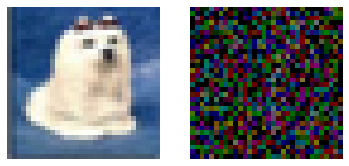

In [6]:
list1 = [dogs[200], dogs_shuffle[200]] 
fig, axs = plt.subplots(1, 2) 
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(list1[idx], cmap=plt.cm.binary)
    ax.axis("off")
    

In [7]:
type(dogs_shuffle)
type(cats_shuffle)

numpy.ndarray

In [8]:
########################################################
###  Col 1              |   Col 2                    ###
###  -------------------|----------------------------###
###  dogs               |   dog_sample               ###
###  dogs_shuffle       |   cat_sample               ###
###  cats               |   dog_sample_shuffle       ###
###  cats_shuffle       |   cat_sample_shuffle       ###
###                     |   noise                    ###
########################################################



diffr(dogs, dog_sample, 'dogVS1000dogs')
diffr(dogs, cat_sample, 'catVS1000dogs')
diffr(dogs, dog_sample_shuffle, 'SdogVS1000dogs')
diffr(dogs, cat_sample_shuffle, 'ScatVS1000dogs')
diffr(dogs, noise, 'noiseVS1000dogs')

diffr(dogs_shuffle, dog_sample, 'dogVS1000Sdogs')
diffr(dogs_shuffle, cat_sample, 'catVS1000Sdogs')
diffr(dogs_shuffle, dog_sample_shuffle, 'SdogVS1000Sdogs')
diffr(dogs_shuffle, cat_sample_shuffle, 'ScatVS1000Sdogs')
diffr(dogs_shuffle, noise, 'noiseVS1000Sdogs')

diffr(cats, cat_sample, 'catVS1000cats')
diffr(cats, dog_sample, 'dogVS1000cats')
diffr(cats, dog_sample_shuffle, 'SdogVS1000cats')
diffr(cats, cat_sample_shuffle, 'ScatVS1000cats')
diffr(cats, noise, 'noiseVS1000cats')

diffr(cats_shuffle, cat_sample, 'catVS1000Scats')
diffr(cats_shuffle, dog_sample, 'dogVS1000Scats')
diffr(cats_shuffle, dog_sample_shuffle, 'SdogVS1000Scats')
diffr(cats_shuffle, cat_sample_shuffle, 'ScatVS1000Scats')
diffr(cats_shuffle, noise, 'noiseVS1000Scats')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sewar/full_ref.py:248: RuntimeWarning: divide by zero encountered in true_divide
  rase_map = (100./M) * np.sqrt( np.sum(rmse_map**2,axis=2) / N )
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sewar/utils.py:18: UserWarning: Supplied images have different dtypes int8 and uint8
  warnings.warn(msg)
